In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
infile = '../Sesion3/data_retail/customers'
df_customers = pd.read_csv(infile,sep='|', header=None, names=["customer_id","customer_fname","customer_lname","customer_email","customer_password","customer_street","customer_city","customer_state","customer_zipcode"])

df_customers.head()

,customer_id,customer_fname,customer_lname,customer_email,customer_password,customer_street,customer_city,customer_state,customer_zipcode
0,1,Richard,Hernandez,XXXXXXXXX,XXXXXXXXX,6303 Heather Plaza,Brownsville,TX,78521
1,2,Mary,Barrett,XXXXXXXXX,XXXXXXXXX,9526 Noble Embers Ridge,Littleton,CO,80126
2,3,Ann,Smith,XXXXXXXXX,XXXXXXXXX,3422 Blue Pioneer Bend,Caguas,PR,725
3,4,Mary,Jones,XXXXXXXXX,XXXXXXXXX,8324 Little Common,San Marcos,CA,92069
4,5,Robert,Hudson,XXXXXXXXX,XXXXXXXXX,10 Crystal River Mall,Caguas,PR,725


In [4]:
infile = '../Sesion3/data_retail/orders'

df_orders = pd.read_csv(infile,sep='|', header=None, names=["order_id","order_date","order_customer_id","order_status"])
df_orders.head()

,order_id,order_date,order_customer_id,order_status
0,1,2013-07-25 00:00:00.0,11599,CLOSED
1,2,2013-07-25 00:00:00.0,256,PENDING_PAYMENT
2,3,2013-07-25 00:00:00.0,12111,COMPLETE
3,4,2013-07-25 00:00:00.0,8827,CLOSED
4,5,2013-07-25 00:00:00.0,11318,COMPLETE


In [5]:
infile = '../Sesion3/data_retail/order_items'

df_order_items = pd.read_csv(infile,sep='|', header=None, names=["order_item_id","order_item_order_id","order_item_product_id","order_item_quantity","order_item_subtotal","order_item_product_price"])
df_order_items.head()

,order_item_id,order_item_order_id,order_item_product_id,order_item_quantity,order_item_subtotal,order_item_product_price
0,1,1,957,1,299.98,299.98
1,2,2,1073,1,199.99,199.99
2,3,2,502,5,250.00,50.00
3,4,2,403,1,129.99,129.99
4,5,4,897,2,49.98,24.99


In [6]:
infile = '../Sesion3/data_retail/departments'

df_departments = pd.read_csv(infile,sep='|', header=None, names=['department_id', 'department_name'])
df_departments.head()

,department_id,department_name
0,2,Fitness
1,3,Footwear
2,4,Apparel
3,5,Golf
4,6,Outdoors


In [7]:
infile = '../Sesion3/data_retail/categories'

df_categories = pd.read_csv(infile,sep='|', header=None, names=["category_id", "category_department_id", "category_name"])
df_categories.head()

,category_id,category_department_id,category_name
0,1,2,Football
1,2,2,Soccer
2,3,2,Baseball & Softball
3,4,2,Basketball
4,5,2,Lacrosse


In [8]:
infile = '../Sesion3/data_retail/products'

df_products = pd.read_csv(infile,sep='|', header=None, names=["product_id","product_category_id","product_name","product_description","product_price","product_image"])
df_products.head()

,product_id,product_category_id,product_name,product_description,product_price,product_image
0,1,2,Quest Q64 10 FT. x 10 FT. Slant Leg Instant U,NaN,59.98,http://images.acmesports.sports/Quest+Q64+10+F...
1,2,2,Under Armour Men's Highlight MC Football Clea,NaN,129.99,http://images.acmesports.sports/Under+Armour+M...
2,3,2,Under Armour Men's Renegade D Mid Football Cl,NaN,89.99,http://images.acmesports.sports/Under+Armour+M...
3,4,2,Under Armour Men's Renegade D Mid Football Cl,NaN,89.99,http://images.acmesports.sports/Under+Armour+M...
4,5,2,Riddell Youth Revolution Speed Custom Footbal,NaN,199.99,http://images.acmesports.sports/Riddell+Youth+...


In [18]:
# Clientes con mas ordenes de compras
df_orders['order_customer_id'].value_counts().nlargest(10)

order_customer_id
6316     16
5897     16
569      16
12431    16
5283     15
5624     15
4320     15
221      15
12284    15
5654     15
Name: count, dtype: int64

In [23]:
# Ventas por mes
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68883 entries, 0 to 68882
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           68883 non-null  int64         
 1   order_date         68883 non-null  datetime64[ns]
 2   order_customer_id  68883 non-null  int64         
 3   order_status       68883 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.1+ MB


In [22]:
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])

In [24]:
df_orders['month'] = df_orders['order_date'].dt.month

In [27]:
df_orders.head()

,order_id,order_date,order_customer_id,order_status,month
0,1,2013-07-25,11599,CLOSED,7
1,2,2013-07-25,256,PENDING_PAYMENT,7
2,3,2013-07-25,12111,COMPLETE,7
3,4,2013-07-25,8827,CLOSED,7
4,5,2013-07-25,11318,COMPLETE,7


In [28]:
ventas_mes = df_orders.groupby('month')['order_id'].count()
print(ventas_mes)

month
1     5908
2     5635
3     5778
4     5657
5     5467
6     5308
7     6001
8     5680
9     5841
10    5335
11    6381
12    5892
Name: order_id, dtype: int64


In [29]:
df_orders['year'] = df_orders['order_date'].dt.year
df_orders.head()

,order_id,order_date,order_customer_id,order_status,month,year
0,1,2013-07-25,11599,CLOSED,7,2013
1,2,2013-07-25,256,PENDING_PAYMENT,7,2013
2,3,2013-07-25,12111,COMPLETE,7,2013
3,4,2013-07-25,8827,CLOSED,7,2013
4,5,2013-07-25,11318,COMPLETE,7,2013


In [35]:
ventas_mes = df_orders.groupby(['year','month'])['order_id'].count()

In [36]:
ventas_mes

year  month
2013  7        1533
      8        5680
      9        5841
      10       5335
      11       6381
      12       5892
2014  1        5908
      2        5635
      3        5778
      4        5657
      5        5467
      6        5308
      7        4468
Name: order_id, dtype: int64

In [39]:
# promedio de ingreso por dia

promedio = pd.merge(df_order_items, df_orders, left_on='order_item_order_id', right_on='order_id') \
            .groupby(df_orders['order_date'].dt.date)['order_item_subtotal'].sum().mean()
promedio

37278.47445054945

In [46]:
count_ventas = df_orders.groupby('order_date')['order_id'].count()

promedio = pd.merge(df_order_items, df_orders, left_on='order_item_order_id', right_on='order_id') \
            .groupby(df_orders['order_date'].dt.date)['order_item_subtotal'].sum()
promedio_ventas_dia = promedio / count_ventas

In [47]:
promedio_ventas_dia

order_date
2013-07-25    188.151259
2013-07-26    195.024461
2013-07-27    196.813861
2013-07-28    188.838610
2013-07-29    201.626601
                 ...    
2014-07-20    199.247123
2014-07-21    185.650681
2014-07-22    205.014130
2014-07-23    194.402349
2014-07-24    199.801892
Length: 364, dtype: float64

In [51]:
ventas_departamento = df_departments.merge(df_categories, left_on='department_id', right_on='category_department_id')\
                        .merge(df_products, left_on='category_id', right_on='product_category_id')\
                        .merge(df_order_items, left_on='product_id', right_on= 'order_item_product_id')\
                        .groupby('department_name')['order_item_subtotal'].sum()
print(type(ventas_departamento))


<class 'pandas.core.series.Series'>


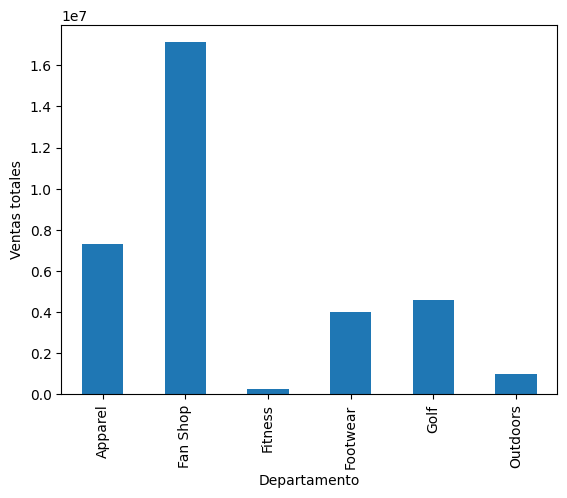

In [52]:
import matplotlib.pyplot as plt
ventas_departamento.plot(kind='bar')
plt.xlabel('Departamento')
plt.ylabel('Ventas totales')
plt.show()

In [53]:
df_orders['order_date'].dt.day_name()

0         Thursday
1         Thursday
2         Thursday
3         Thursday
4         Thursday
           ...    
68878    Wednesday
68879       Sunday
68880     Saturday
68881      Tuesday
68882    Wednesday
Name: order_date, Length: 68883, dtype: object

In [55]:
df_ventas_categoria = df_categories.merge(df_products, left_on='category_id', right_on='product_category_id')\
                        .merge(df_order_items, left_on='product_id', right_on= 'order_item_product_id')\
                        .groupby('category_name')['order_item_subtotal'].sum()
total_ventas = df_order_items['order_item_subtotal'].sum()

pct_ventas_categoria = (df_ventas_categoria / total_ventas) * 100
pct_ventas_categoria

category_name
Accessories              0.389456
As Seen on  TV!          0.060013
Baseball & Softball      0.274038
Basketball               0.078955
Boxing & MMA             0.248249
Camping & Hiking        11.999158
Cardio Equipment        10.765038
Cleats                  12.912600
Electronics              1.081021
Fishing                 20.189757
Fitness Accessories      0.103726
Girls' Apparel           0.442001
Golf Apparel             0.101885
Golf Bags & Carts        0.030212
Golf Balls               0.224628
Golf Gloves              0.339996
Golf Shoes               0.314655
Hockey                   0.140900
Hunting & Shooting       0.165630
Indoor/Outdoor Games     8.417172
Kids' Golf Clubs         0.287850
Lacrosse                 0.114982
Men's Footwear           8.425224
Men's Golf Clubs         0.137040
Shop By Sport            3.815332
Soccer                   0.077142
Strength Training        0.159940
Tennis & Racquet         0.129900
Trade-In                 0.200223


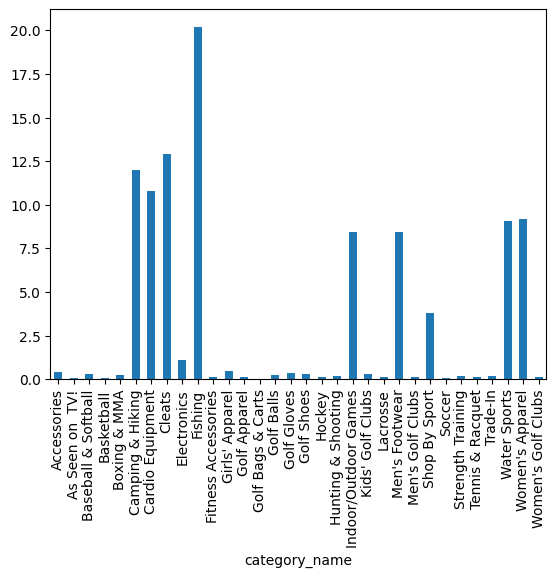

In [57]:
pct_ventas_categoria.plot(kind='bar')
plt.show()